# Dataset Information

The MNIST dataset contains images of handwritten digits from 0 to 9.

- Each image is **28x28 pixels**, stored as **784 pixel values** in one row.
- The first column is **'label'**, which tells which digit the image represents.
- The remaining columns are pixel values ranging from 0 to 255.
- The training dataset has **60,000 samples** and the test file dataset **10,000 samples**.

This dataset is commonly used to train and test digit recognition models.

## Import Modules and Load Dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
train_dataset=pd.read_csv(r"mnist_train.csv")
test_dataset=pd.read_csv(r"mnist_test.csv")
m=train_dataset.shape[0]
n=train_dataset.shape[1]



## Preview datasets

In [5]:
# printing the datase
train_dataset.head()
test_dataset.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#display basic info about datatype
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None


In [7]:
#display no of samples of each class
label_counts = train_dataset['label'].value_counts().sort_index()
print(label_counts)

label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64


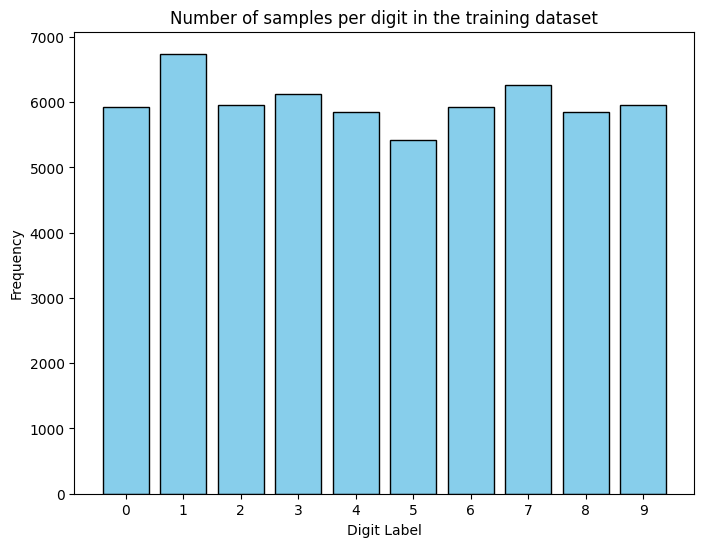

In [8]:
#visualizing each labels frequency

plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values, color='skyblue', edgecolor='black')
plt.title("Number of samples per digit in the training dataset")
plt.xlabel("Digit Label")
plt.ylabel("Frequency")
plt.xticks(label_counts.index)
plt.show()

## Preprocessing the training dataset

In [9]:
#to check for null values
if(train_dataset.isnull().sum().sum()!=0):
    print("Null values are there preprocessing requires")
else:
    print("No null values are there")

No null values are there


## Visualizing the csv data into an image

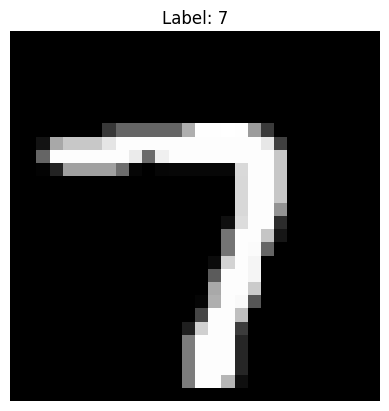

In [10]:
#visualize any data sample as an image 

index = np.random.randint(0,m)  

# Extract label and pixel values
label = train_dataset.iloc[index, 0]
pixels = train_dataset.iloc[index, 1:].values

# Reshape to 28x28 image
image = pixels.reshape((28, 28))

# Plot it
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()

## Normalize The Dataset

Calculate the mean and standard deviation of training dataset and apply this fit or normalization on both training and testing dataset

In [11]:
#labels and features seperated as X and Y from training and testing dataset
Y_train=train_dataset['label']
Y_test=test_dataset['label']
X_train=train_dataset.drop('label',axis=1)
X_test=test_dataset.drop('label',axis=1)

In [12]:
#for convergence we have to scale the data
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Logistic Regression Model for Classification

In [13]:
#logistic regression model
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(X_train,Y_train)
acc_logistic=model.score(X_test,Y_test)*100
print("Accuracy of Logistic Regression as model for our dataset :"+str(acc_logistic)+"%")
Y_pred_lr=model.predict(X_test)

Accuracy of Logistic Regression as model for our dataset :92.17%


## Multi layer perceptron Model(Neural Network) for Classification

In [14]:
#Multi layer perceptron model
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, random_state=42)
model.fit(X_train,Y_train)
acc_nn=model.score(X_test,Y_test)*100
Y_pred_nn=model.predict(X_test)
print("Accuracy of Multi Layer Perceptron as model for our dataset :"+str(acc_nn)+"%")

Accuracy of Multi Layer Perceptron as model for our dataset :97.65%


## Classification Report and confusion matrix

In [17]:
#classification report and confusion matrix of all models
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion matrix for logistic regression model \n"+str(confusion_matrix(Y_test, Y_pred_lr)))
print("Classification report for logistic regression model \n"+str(classification_report(Y_test, Y_pred_lr)))

Confusion matrix for logistic regression model 
[[ 947    0    3    4    2   12    6    3    3    0]
 [   0 1108    8    3    0    2    3    1   10    0]
 [  10    9  918   17   11    5   13    7   38    4]
 [   3    1   19  922    2   21    3   11   21    7]
 [   1    3    9    4  915    1    7    7    6   29]
 [  10    5    3   34    9  773   14    8   32    4]
 [   8    4    8    3    5   18  909    1    2    0]
 [   3    8   23    7    6    2    0  944    5   30]
 [  10   12    5   23    8   26    9    9  857   15]
 [   7    7    2    8   20    8    0   23   10  924]]
Classification report for logistic regression model 
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.92      0.89      0.90      1032
           3       0.90      0.91      0.91      1010
           4       0.94      0.93      0.93       982
           5       0.89      0.87      0.88

In [19]:
print("Confusion matrix for Multi layer perceptron Model \n"+str(confusion_matrix(Y_test, Y_pred_nn)))
print("Classification report for Multi layer perceptron Model \n"+str(classification_report(Y_test, Y_pred_nn)))


Confusion matrix for Multi layer perceptron Model 
[[ 965    0    1    0    0    2    5    1    3    3]
 [   0 1124    3    1    0    1    3    1    2    0]
 [   5    2 1003    3    1    1    2    4   11    0]
 [   0    0    7  989    0    6    1    3    2    2]
 [   3    1    3    1  959    0    5    1    2    7]
 [   2    0    0    7    1  873    3    0    4    2]
 [   5    2    4    1    3    3  937    0    3    0]
 [   1    4   11    2    1    0    0 1001    2    6]
 [   3    0    4    6    5    5    2    3  942    4]
 [   2    4    1    7    8    3    0    9    3  972]]
Classification report for Multi layer perceptron Model 
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98    

## Comparison of accuracies

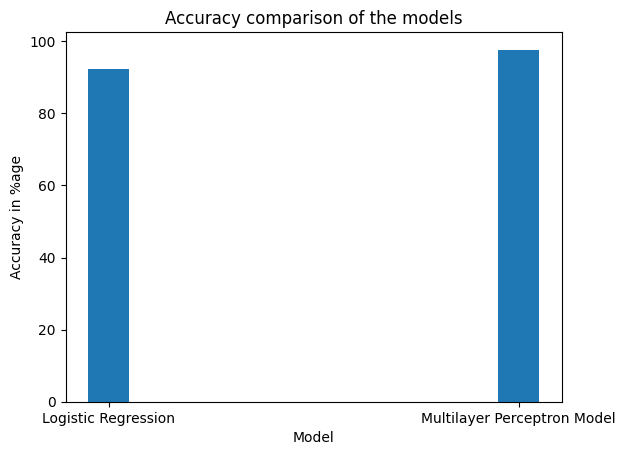

In [ ]:
#Accuracy of all models-visualized
models=['Logistic Regression','Multilayer Perceptron Model']
acc_y=[acc_logistic,acc_nn]
plt.bar(models,acc_y,width=0.1)
plt.title("Accuracy comparison of the models")
plt.xlabel("Model")
plt.ylabel("Accuracy in %age")
plt.show()

